In [1]:
import numpy as np
import numpy.linalg as lin
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib.pyplot as plt
import scipy.special as sp

## a)

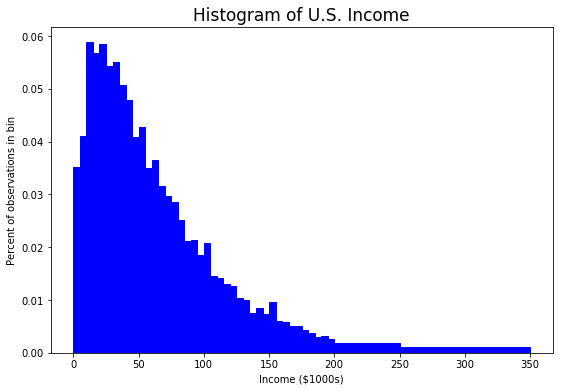

In [2]:
data = np.loadtxt('/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Econ/Wk4_StrEst/data/usincmoms.txt',delimiter='\t')
midpoints = data[:,1]
percents = data[:,0]
avg_inc = np.mean(percents@midpoints)

percents[-2] = percents[-2]/10
percents[-1] = percents[-1]/20

plt.subplots(figsize=(9, 6))
plt.bar(midpoints[:-2]/1000, percents[:-2], width=5, facecolor='blue', edgecolor='blue')
plt.bar(midpoints[-2]/1000, percents[-2], width=50, facecolor='blue', edgecolor='blue')
plt.bar(midpoints[-1]/1000, percents[-1], width=100, facecolor='blue', edgecolor='blue')
plt.title('Histogram of U.S. Income', fontsize=17)
plt.xlabel(r'Income ($1000s)')
plt.ylabel(r'Percent of observations in bin')
plt.show()

## b)

In [3]:
# Define function that generates values of lognormal PDF
def lognorm_pdf(xvals, mu, sigma):
    pdf_vals= (1/(xvals*sigma * np.sqrt(2 * np.pi)) *
                    np.exp(-(np.log(xvals) - mu)**2 /(2 * sigma**2)))
    pdf_vals[pdf_vals==0] = 1e-10
    return pdf_vals

def model_moments_log(midpoints, mu, sigma):
    mod_moments = 5e3*lognorm_pdf(midpoints, mu, sigma)
    return mod_moments

def err_vec_log(midpoints, percents, mu, sigma, simple=False):
    moms_model = model_moments_log(midpoints, mu,sigma)
    moms_data = percents
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    return err_vec

def criterion_log(params, *args):
    mu, sigma = params
    midpoints, percents, W = args
    err = err_vec_log(midpoints, percents, mu, sigma)
    crit_val = np.dot(np.dot(err.T, W), err) 
    return crit_val 

In [4]:
mu_init = np.log(avg_inc)
sig_init = 1.5
params_init1 = np.array([mu_init, sig_init])
W_hat = np.diag(percents)
gmm_args1 = (midpoints, percents, W_hat)
bounds1 = ((None, None), (1e-10, None))
results1 = opt.minimize(criterion_log, params_init1, args=(gmm_args1), bounds=bounds1)
mu_GMM1, sig_GMM1 = results1.x
print(results1)
print('mu_GMM1=', mu_GMM1, ' sig_GMM1=', sig_GMM1)
print('Criterion Value=', results1.fun)

      fun: 0.032516124777360655
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -3.56381591e-06,   1.56749613e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 27
      nit: 7
   status: 0
  success: True
        x: array([ 10.84684104,   1.02970059])
mu_GMM1= 10.8468410399  sig_GMM1= 1.02970058657
Criterion Value= 0.0325161247774


/Users/rubyzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/rubyzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/Users/rubyzhang/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in multiply


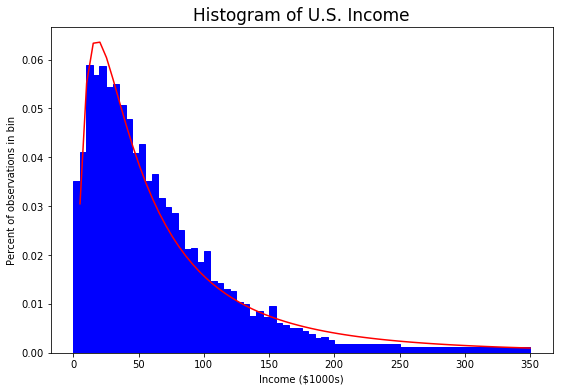

In [5]:
x = np.linspace(0,350000,70)
y1 = 5000*lognorm_pdf(x, mu_GMM1, sig_GMM1)
plt.subplots(figsize=(9, 6))
plt.bar(midpoints[:-2]/1000, percents[:-2], width=5, facecolor='blue', edgecolor='blue')
plt.bar(midpoints[-2]/1000, percents[-2], width=50, facecolor='blue', edgecolor='blue')
plt.bar(midpoints[-1]/1000, percents[-1], width=100, facecolor='blue', edgecolor='blue')
plt.plot(x/1000,y1,'r-')
plt.title('Histogram of U.S. Income', fontsize=17)
plt.xlabel(r'Income ($1000s)')
plt.ylabel(r'Percent of observations in bin')
plt.show()

# c)

In [6]:
def model_moments_gamma(midpoints, alpha, beta):
    mod_moments = 5e3*sts.gamma.pdf(midpoints, alpha, scale=beta)
    return mod_moments

def err_vec_gamma(midpoints, percents, alpha, beta, simple=False):
    moms_model = model_moments_gamma(midpoints, alpha,beta)
    moms_data = percents
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    return err_vec

def criterion_gamma(params, *args):
    alpha,beta = params
    midpoints, percents, W = args
    err = err_vec_gamma(midpoints, percents, alpha, beta)
    crit_val = np.dot(np.dot(err.T, W), err) 
    return crit_val 

In [7]:
alpha_init = 3
beta_init = 20000
params_init2 = np.array([alpha_init, beta_init])
W_hat = np.diag(percents)
gmm_args2 = (midpoints, percents, W_hat)
bounds2 = ((1e-10, None), (1e-10, None))
results2 = opt.minimize(criterion_gamma, params_init2, args=(gmm_args2), bounds=bounds2)
alpha_GMM1, beta_GMM1 = results2.x
print(results2)
print('alpha_GMM1=', alpha_GMM1, ' beta_GMM1=', beta_GMM1)
print('Criterion Value=', results2.fun)

      fun: 0.0062921356727820687
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -1.64940978e-05,   0.00000000e+00])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 117
      nit: 28
   status: 0
  success: True
        x: array([  1.43449582e+00,   4.44244439e+04])
alpha_GMM1= 1.43449581698  beta_GMM1= 44424.4438948
Criterion Value= 0.00629213567278


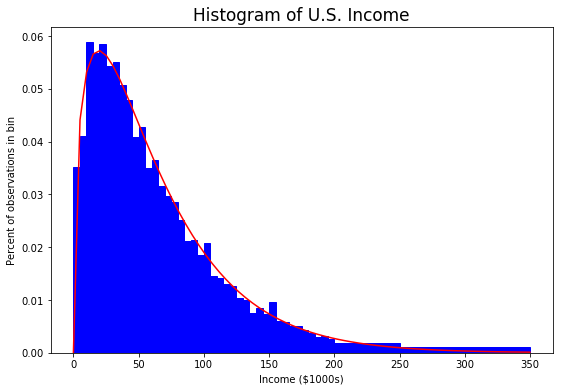

In [8]:
x = np.linspace(0,350000,70)
y2 = 5000*sts.gamma.pdf(x, alpha_GMM1, scale=beta_GMM1)
plt.subplots(figsize=(9, 6))
plt.bar(midpoints[:-2]/1000, percents[:-2], width=5, facecolor='blue', edgecolor='blue')
plt.bar(midpoints[-2]/1000, percents[-2], width=50, facecolor='blue', edgecolor='blue')
plt.bar(midpoints[-1]/1000, percents[-1], width=100, facecolor='blue', edgecolor='blue')
plt.plot(x/1000,y2,'r-')
plt.title('Histogram of U.S. Income', fontsize=17)
plt.xlabel(r'Income ($1000s)')
plt.ylabel(r'Percent of observations in bin')
plt.show()

# d)

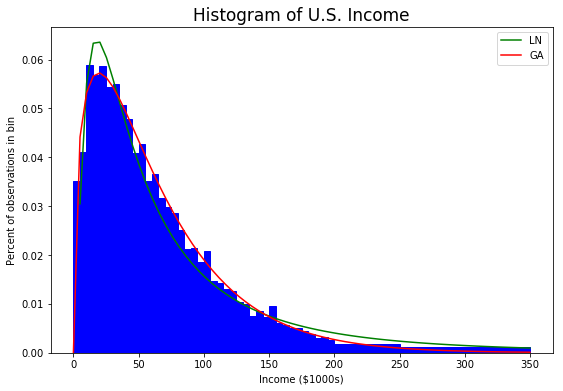

In [9]:
x = np.linspace(0,350000,70)
plt.subplots(figsize=(9, 6))
plt.bar(midpoints[:-2]/1000, percents[:-2], width=5, facecolor='blue', edgecolor='blue')
plt.bar(midpoints[-2]/1000, percents[-2], width=50, facecolor='blue', edgecolor='blue')
plt.bar(midpoints[-1]/1000, percents[-1], width=100, facecolor='blue', edgecolor='blue')
plt.plot(x/1000,y1,'g-',label='LN')
plt.plot(x/1000,y2,'r-',label='GA')
plt.title('Histogram of U.S. Income', fontsize=17)
plt.xlabel(r'Income ($1000s)')
plt.legend()
plt.ylabel(r'Percent of observations in bin')
plt.show()

Overall, the gamma distribution seems to fit the data better than the lognormal. This is expected since the criterion value for the gamma distribution is lower than the lognormal distribution.

# e)

In [10]:
alpha_init2 = 3
beta_init2 = 20000

params_init_1 = np.array([alpha_init2, beta_init2])
gmm_args_1 = (midpoints, percents, np.eye(len(midpoints)))
bounds_1 = ((1e-10, None), (1e-10, None))
results_1 = opt.minimize(criterion_gamma, params_init_1, args=(gmm_args_1), bounds=bounds_1)
alpha_GMM_1, beta_GMM_1 = results_1.x

err = np.array([err_vec_gamma(midpoints, percents, alpha_GMM_1, beta_GMM_1)])
VCV2 = (err.T@err)/len(midpoints)
W_hat2 = lin.pinv(VCV2)

params_init_2 = np.array([alpha_init2, beta_init2])
gmm_args_2 = (midpoints, percents, W_hat2)
bounds_2 = ((1e-10, None), (1e-10, None))
results_2 = opt.minimize(criterion_gamma, params_init_2, args=(gmm_args_2), bounds=bounds_2)
alpha_GMM_2, beta_GMM_2 = results_2.x

print(results_2)
print('alpha_GMM2=', alpha_GMM_2, ' beta_GMM2=', beta_GMM_2)
print('Criterion Value=', results_2.fun)

      fun: -4.6216748698287035e-16
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([  1.36650412e-07,   7.24271160e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 165
      nit: 24
   status: 0
  success: True
        x: array([  4.12403287e+00,   1.13135973e+04])
alpha_GMM2= 4.12403287094  beta_GMM2= 11313.5973276
Criterion Value= -4.62167486983e-16


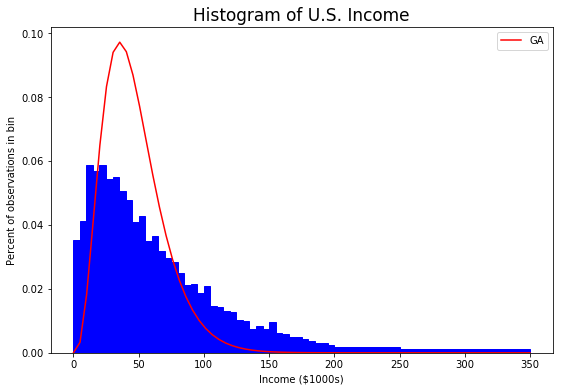

In [11]:
x = np.linspace(0,350000,70)
y3 = 5000*sts.gamma.pdf(x, alpha_GMM_2, scale=beta_GMM_2)
plt.subplots(figsize=(9, 6))
plt.bar(midpoints[:-2]/1000, percents[:-2], width=5, facecolor='blue', edgecolor='blue')
plt.bar(midpoints[-2]/1000, percents[-2], width=50, facecolor='blue', edgecolor='blue')
plt.bar(midpoints[-1]/1000, percents[-1], width=100, facecolor='blue', edgecolor='blue')
plt.plot(x/1000,y3,'r-',label='GA')
plt.title('Histogram of U.S. Income', fontsize=17)
plt.xlabel(r'Income ($1000s)')
plt.legend()
plt.ylabel(r'Percent of observations in bin')
plt.show()